### **Visual icesat1 data on the selected region.**

In [1]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_glah14_readout = 'data/icesat-1/GLAH14-2006/data-readout/GLAH14_634_2115_001_1317_0_01_0001_readout_subs.h5'
path_glah14_tile= 'data/icesat-1/GLAH14-2006/data-tiles/tile_29_98.h5'


### Read icesat-1 glah14 data

In [3]:
!h5ls $path_glah14_readout
!h5ls $path_glah14_tile
# !h5ls $path_glah14/Data_40HZ/Geolocation


h                        Dataset {369}
lat                      Dataset {369}
lon                      Dataset {369}
orbit                    Dataset {369}
t_dyr                    Dataset {369}
track                    Dataset {369}
h                        Dataset {378}
lat                      Dataset {378}
lon                      Dataset {378}
orbit                    Dataset {378}
t_dyr                    Dataset {378}
track                    Dataset {378}


In [4]:
# keys = ['lon', 'lat', 'h', 't_dyr']   ## output variables
# glah14 = {}
# for key in keys: 
#     glah14[key]=np.array([]); 
# with h5py.File(path_glah14,'r') as f_glah14:
#     glah14['lon'] = f_glah14['Data_40HZ/Geolocation/d_lon'][:]
#     glah14['lat'] = f_glah14['Data_40HZ/Geolocation/d_lat'][:]
#     glah14['h'] = f_glah14['Data_40HZ/Elevation_Surfaces/d_elev'][:]
glah14_readout = h5py.File(path_glah14_readout,'r')
glah14_tile = h5py.File(path_glah14_tile,'r')
# lon, lat, h = f_glah14['lon'][:], f_glah14['lat'][:], f_glah14['h'][:]
# lon_tile, lat_tile, h_tile = f_glah14_tile['lon'][:], f_glah14_tile['lat'][:], f_glah14_tile['h'][:]
# lon_tile


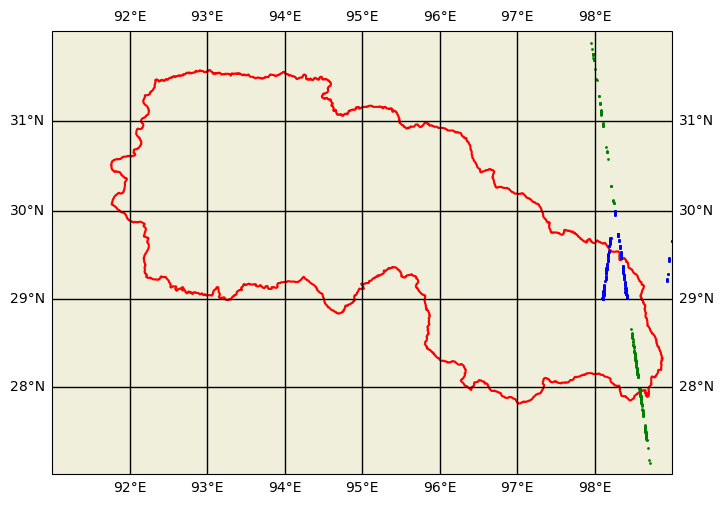

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='black')
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-1 data (one file)
ax.scatter(x=glah14_readout['lon'][:], y=glah14_readout['lat'][:], color='green', s=1, transform=ccrs.PlateCarree(), zorder=0)

## 3. icesat-1 data (one tile)
ax.scatter(x=glah14_tile['lon'][:], y=glah14_tile['lat'][:], color='blue', s=1, transform=ccrs.PlateCarree(), zorder=0)

